In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers

In [2]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=15

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "plantvillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [4]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [5]:
class_names=dataset.class_names

In [6]:
len(dataset)

68

In [7]:
def data_split(ds,train_split,test_split,val_split,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    train_size=int(train_split*ds_size)
    test_size=int(test_split*ds_size)
    val_size=int(val_split*ds_size)
    train=ds.take(train_size)
    val=ds.skip(train_size).take(val_size)
    test=ds.skip(train_size).skip(test_size)

    
    return train,test,val

In [8]:
train,test,val=data_split(dataset,0.8,0.1,0.1)

In [9]:
train=train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test=test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val=val.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:

augmentation=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)]
                             )

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model=models.Sequential([
    augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(3,activation="softmax")
])


In [ ]:
model.build(input_shape=input_shape)

In [ ]:
model.summary()

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [ ]:
model.fit(
    train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val
)

In [ ]:
model.save("potato_disease.keras")


In [10]:
loaded_model = tf.keras.models.load_model("potato_disease.keras")

In [13]:
predict=loaded_model.predict(test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step


In [12]:

loaded_model.evaluate(test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - accuracy: 0.9762 - loss: 0.0673


[0.09446870535612106, 0.9612069129943848]

In [17]:
import numpy as np
class_names[np.argmax(predict[0])]

'Potato___Early_blight'

actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
Potato___Late_blight


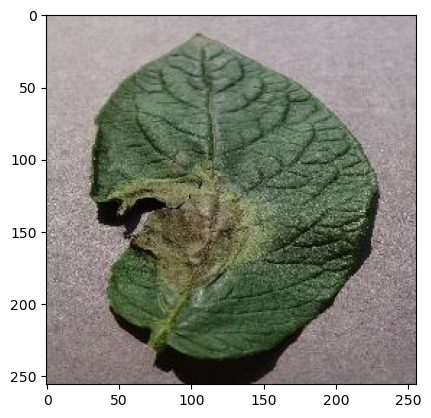

In [56]:
for image,label in test.take(1):
    firstimage=image[0].numpy().astype('uint8')
    firstlabel=label[0].numpy()
    plt.imshow(firstimage)
    print("actual label:",class_names[firstlabel])
    prediction=loaded_model.predict(image)
    print(class_names[np.argmax(prediction[0])])